# Parte A

**Enunciado da tarefa da parte A:** Busque um dataset e faça histogramas de duas features para cada classe no dataset, conforme procedimento mostrado em sala. Faça dois conjuntos de histogramas com tamanhos de bins diferentes. Discuta os histogramas do ponto de vista de classificação usando aprendizado de máquina e também discuta os tamanhos dos bins usados.


Importando libs e funções que serão utilizadas

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import pandas as pd

Instalando pacote **ucimlrepo** para baixar o dataset do UCI

In [2]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Importando função *fetch_ucirepo* que baixa o dataset a partir do ID

In [3]:
from ucimlrepo import fetch_ucirepo

Importando dataset *wine_quality* a partir de seu ID

In [4]:
wine_quality = fetch_ucirepo(id=186)

### Análise Exploratória dos Dados

**Visão geral sobre o dataset escolhido:**

O dataset é composto por dois conjuntos de dados referentes às variantes do vinho português "Vinho Verde", da região Norte de Portugal. Os dados coletados tem como objetivo final modelar e avaliar a qualidade dos vinhos com base nas características físico-químicas.

**Informações adicionais:**
* Características do dataset: multivariada
* Tarefas associadas: regressão e classificação
* Instâncias: 4898
* Qt de Features: 11
* Tipo de Feature: real

**Features do dataset**
* fixed_acidity
* volatile_acidity
* citric_acid
* residual_sugar
* chlorides
* free_sulfur_dioxide
* total_sulfur_dioxide
* density
* pH
* sulphates
* alcohol

**Classe do dataset**
* quality (score entre 0 e 10)


Nas células abaixo serão executados alguns comandos para explorar melhor o dataset utilizado

Imprimindo número de linhas e colunas do dataset, respectivamente

In [5]:
wine_quality.data.original.shape

(6497, 13)

Imprimindo as 5 primeiras linhas do dataset

In [6]:
wine_quality.data.original.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Imprimindo colunas do dataset

In [7]:
wine_quality.data.original.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

A variável 'color' possue os valores 'red' e 'white', que representam, respectivamente, vinho tinto e branco. Para esta análise, selecionaremos somente os vinhos brancos (white).

Imprimindo valores existentes da classe do dataset

In [8]:
sorted(wine_quality.data.original['quality'].unique())

[np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)]

Podemos ver que os valores das classes vão de 3 à 9, indicando a qualidade do vinho.

### Filtrando dataset

Na análise exploratória vimos que o dataset possue várias classes. Para simplificar a análise, criaremos uma linha de corte e transformaremos em uma classe binária, onde:

* 0 = valores de 3 à 6, representando vinho ruim/comum
* 1 = valores de 7 à 9, representando vinho bom/premium

Criando classificação binária

In [9]:
# criando cópia do dataset
dataset_copy = wine_quality.data.original.copy()

# criando coluna com classificação binária
dataset_copy['quality_binary'] = (dataset_copy['quality'] >= 7).astype(int)

# imprimindo contagem dos valores da coluna 'quality_binary'
dataset_copy['quality_binary'].value_counts()

quality_binary
0    5220
1    1277
Name: count, dtype: int64

Com a impressão da contagem dos valores, pode-se ver que temos mais vinhos classificados como **ruim/comum (5220)** do que vinhos **bons/premium (1227)**

Filtrando dataset somente com os vinhos brancos (white)

In [10]:
dataset = dataset_copy
dataset = dataset[dataset['color']=='white']
dataset.shape

(4898, 14)

Filtrando o dataset somente com os vinhos brancos, temos um total de 4898 linhas

### Plotando histogramas

Definindo *features* e classe que serão analisadas

In [11]:
features = ['alcohol', 'volatile_acidity']
classes = [0,1]
labels = ['0: comum', '1: premium']
map_labels = dict(zip(classes, labels))

Definindo função para plotar o histograma

In [12]:
def plot_histogram(df, features, target, n_bins, plot_title, labels_map=None):
    """
    Plota histogramas de densidade para múltiplas features, separados por classes.

    Parâmetros:
    -----------
    df : pandas.DataFrame
        DataFrame contendo os dados a serem plotados.
    features : list of str
        Lista com os nomes das colunas (features) que serão plotadas.
    target : str
        Nome da coluna que representa a variável de classe (target/hue).
    n_bins : int
        Número de bins (faixas) para o histograma.
    plot_title : str
        Título do gráfico.
    labels_map : dict, opcional
        Dicionário para mapear os valores da classe para rótulos mais descritivos.
        Exemplo: {0: 'comum', 1: 'premium'}
    """
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f'Distribuição por Qualidade - {plot_title}', fontsize=16)
    
    plot_df = df.copy()
    if labels_map:
        plot_df[target] = plot_df[target].map(labels_map)
        # Ordena a legenda com base nos valores (textos)
        sorted_labels = sorted(labels_map.values())
    else:
        sorted_labels = sorted(df[target].unique())

    for i, feature in enumerate(features):
        sns.histplot(
            data=plot_df,    
            x=feature,
            hue=target,
            hue_order=sorted_labels,
            element='step',
            stat='density',
            common_norm=False,
            bins=n_bins,
            palette='tab10',
            alpha=0.3,
            ax=axes[i]
        )
        axes[i].set_title(f'Feature: {feature}')
        axes[i].set_ylabel('Densidade')

    plt.tight_layout()
    plt.show()

Chamando função plot_histogram e plotando gráficos para dois tamanhos de bins diferentes

Plot 1 - 15 bins

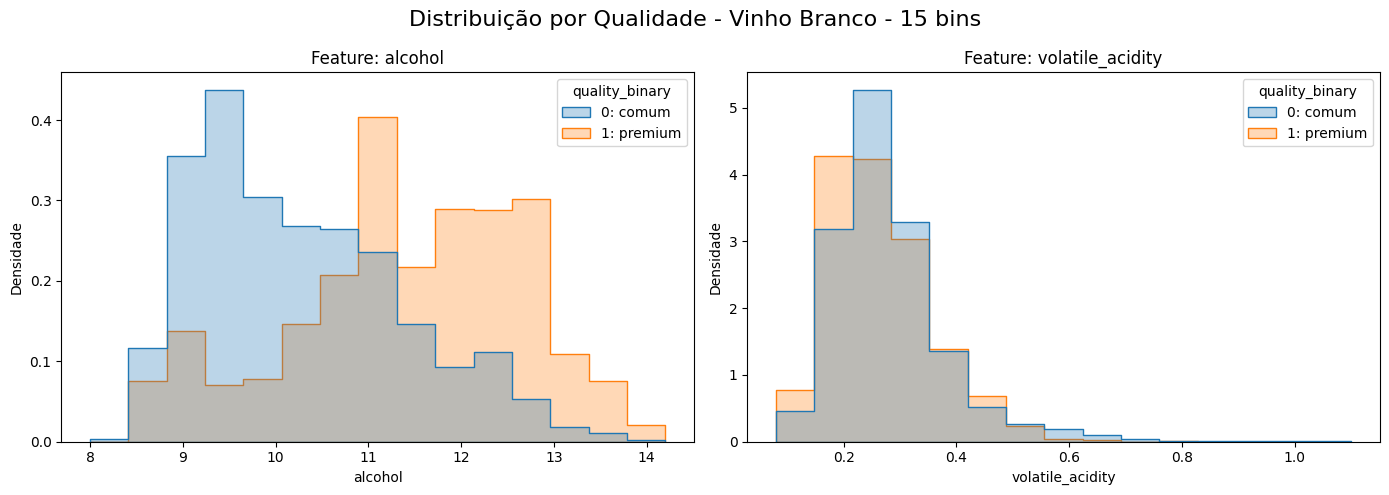

In [13]:
plot_histogram(
    df=dataset,
    features=features,
    target='quality_binary',
    n_bins=15,
    plot_title='Vinho Branco - 15 bins',
    labels_map=map_labels
)

Plot 2 - 40 bins

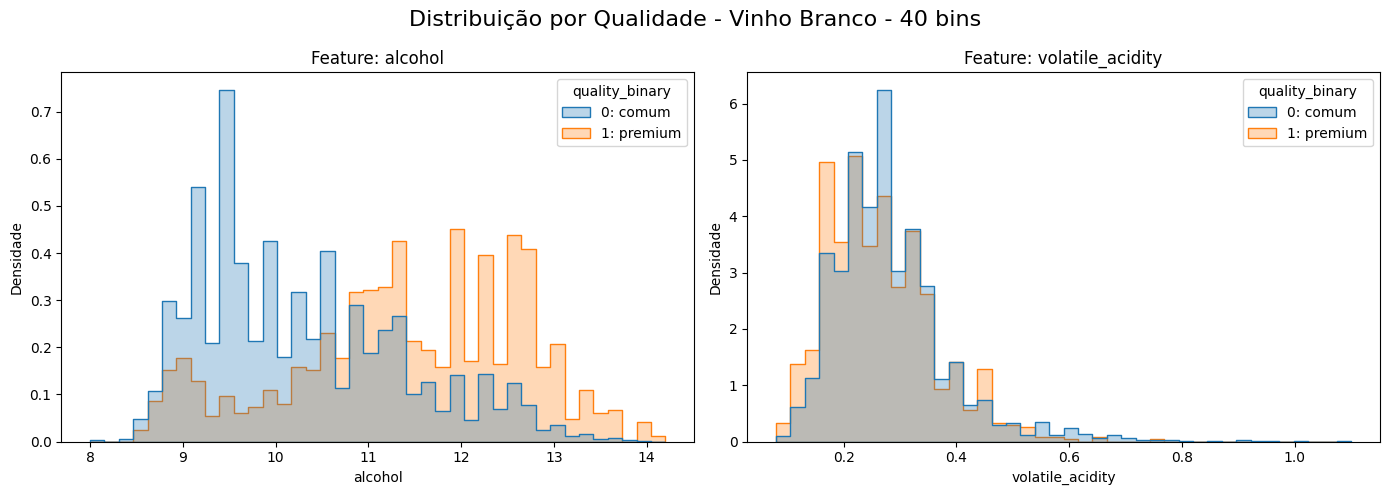

In [14]:
plot_histogram(
    df=dataset,
    features=features,
    target='quality_binary',
    n_bins=40,
    plot_title='Vinho Branco - 40 bins',
    labels_map=map_labels
)

### Plotando histogramas com distribuição normal

Definindo função para o plot

In [15]:
def plot_hist_normal_fit(df, features, target, labels_map=None):
    """
    Plota histogramas de densidade para cada feature, separados por classe, 
    e ajusta uma curva de distribuição normal sobre cada classe.

    Parâmetros:
    -----------
    df : pandas.DataFrame
        DataFrame contendo os dados a serem plotados.
    features : list of str
        Lista com os nomes das colunas (features) que serão analisadas.
    target : str
        Nome da coluna que representa a variável de classe.
    labels_map : dict, opcional
        Dicionário para mapear os valores da classe para rótulos descritivos.
        Exemplo: {0: 'comum', 1: 'premium'}
    """

    # Mapeando os nomes das classes (0 e 1)
    plot_df = df.copy()
    if labels_map:
        plot_df[target] = plot_df[target].map(labels_map)
        # Garantindo ordem dos valores
        classes = sorted(labels_map.values())
    else:
        classes = sorted(plot_df[target].unique())

    # Definindo cores para melhor visualização
    colors = ['#d7191c', '#2c7bb6', 'green', 'orange']

    for feature in features:
        plt.figure(figsize=(12, 6))
        plt.title(f'Distribuição Normal Ajustada: {feature}')
        
        for i, cls in enumerate(classes):
            # Selecionando dados apenas daquela classe
            subset = plot_df[plot_df[target] == cls][feature]

            # Pulando classes vazias ou com apenas 1 elemento
            if len(subset) < 2: continue

            # Escolhendo cores
            color = colors[i % len(colors)]

            # Plotando histograma
            plt.hist(subset, bins=30, density=True, alpha=0.3, color=color, label=f'Hist {cls}')

            # --- CALCULANDO CURVA NORMAL ---

            # Descobrindo Média e Desvio Padrão
            mu, std = norm.fit(subset)

            # Gerando pontos X para desenhar a linha
            x = np.linspace(subset.min(), subset.max(), 100)

            # Calculando probabilidade
            p = norm.pdf(x, mu, std)

            # Plotando linha
            plt.plot(x, p, linewidth=3, color=color, label=rf'Fit {cls} ($\mu$={mu:.1f})')

        plt.xlabel(feature)
        plt.ylabel('Densidade')
        # Posicionando legenda
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

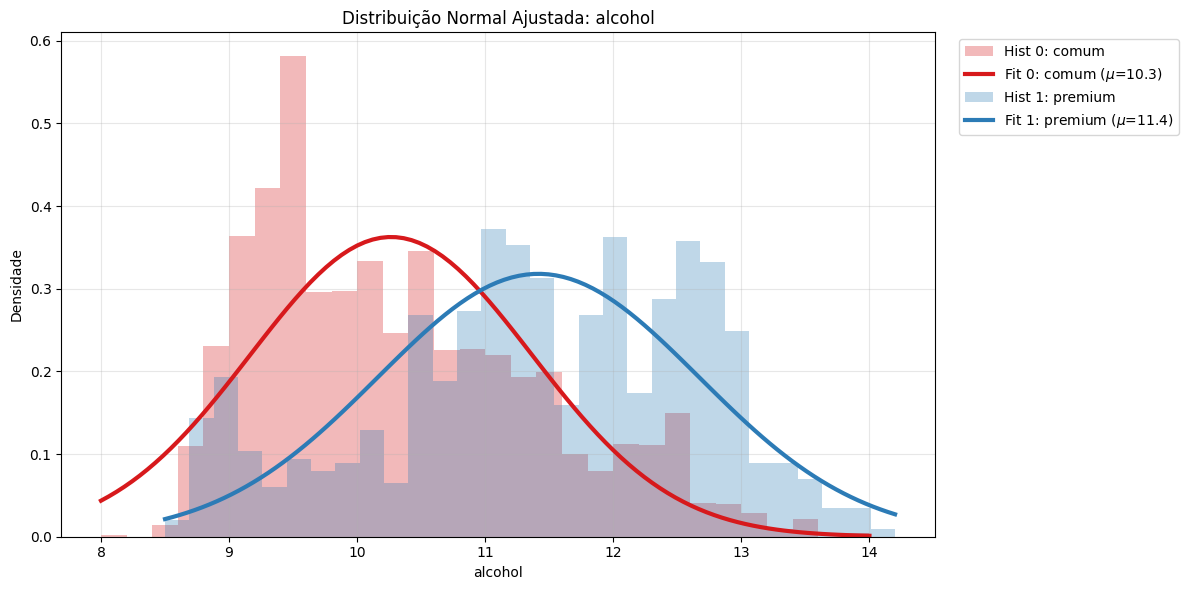

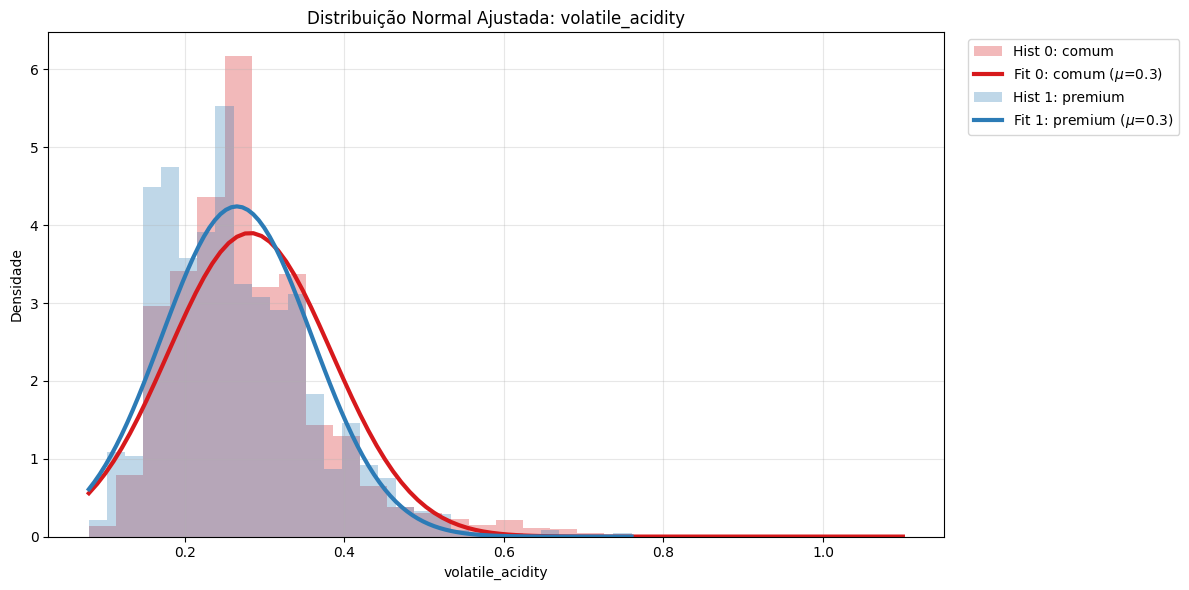

In [16]:
plot_hist_normal_fit(
    df=dataset,
    features=features,
    target='quality_binary',
    labels_map=map_labels
)

# Parte B

**Enunciado da tarefa da parte B:** Considerando o primeiro trabalho, defina um experimento em que dados são coletados de uma variável de interesse do seu trabalho. Produza dados artificiais, plote o histograma e a distribuição que aproxime os dados. Em seguida, defina estudos como o exemplo da pizza explicado em sala, sempre partido da versão não padronizada e depois os cálculos na versão padronizada.  Sempre considerando o contexto do seu primeiro trabalho.

**Contextualização:**

Com base nos histogramas plotados, foi possível identificar que o teor alcoólico (feature alcohol) é um forte discriminante para determiar a qualidade do vinho, isso por que na figura abaixo é possível notar a classe 1 com uma distribuição mais deslocada para a direita (média 11.4).

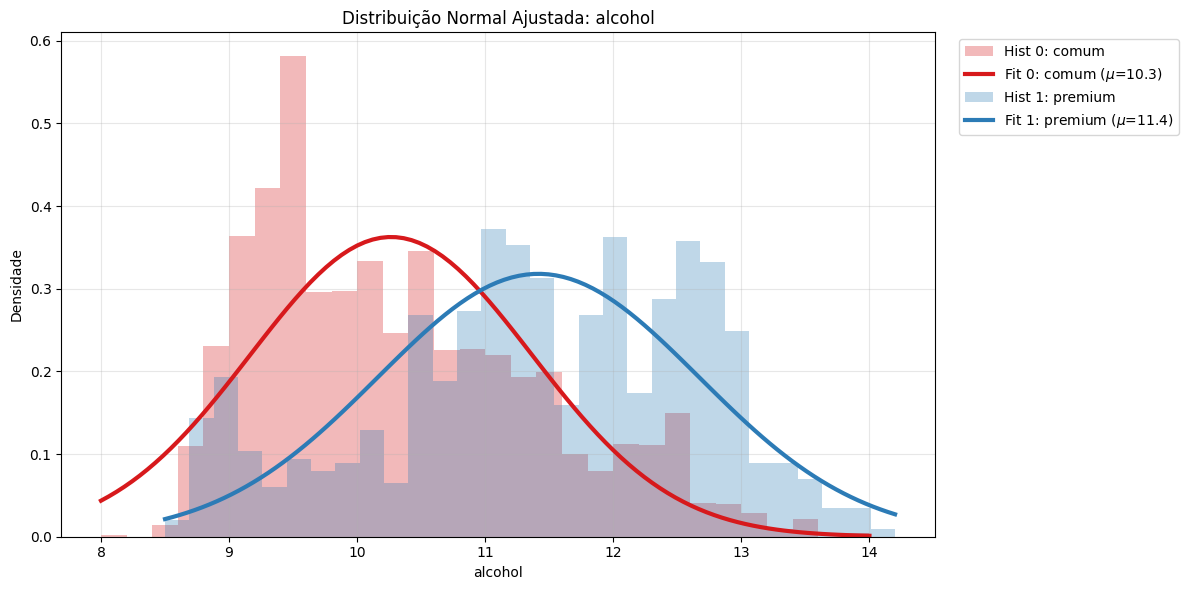

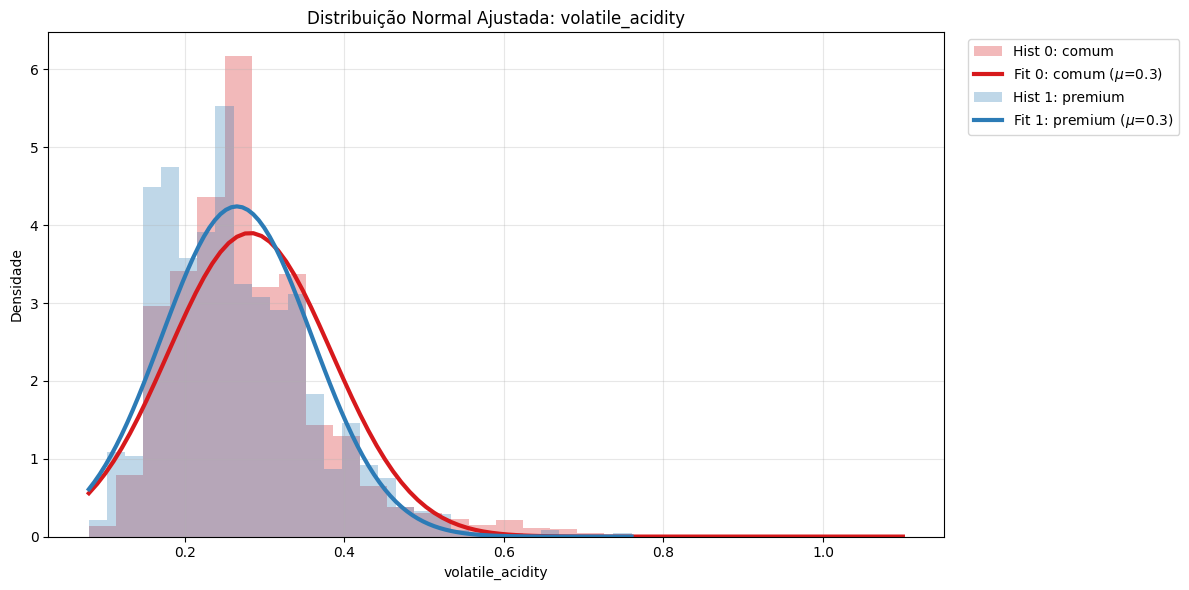

In [17]:
plot_hist_normal_fit(
    df=dataset,
    features=features,
    target='quality_binary',
    labels_map=map_labels
)

**Experimento:**

Assumindo o papel de garantir a qualidade dos vinhos produzidos, o objetivo é garantir que a produção de vinhos mantenha um padrão elevado. Dessa forma, calcularemos a probabilidade de um vinho premium (classe 1) ter **menos de 10% de álcool** (característica que o aproximaria da classe de vinho comum).

**Parâmetros coletados:**

*   Média de vinhos premium
*   Desvio padrão de vinhos premium



Filtrando população de interesse (vinho branco premium)

In [18]:
premium_white_wine = dataset[dataset['quality_binary']==1]['alcohol']
premium_white_wine

1612    12.40
1614    11.40
1616    12.80
1619    12.80
1620    11.00
        ...  
6469    11.45
6475    11.60
6485    12.15
6486    13.00
6495    12.80
Name: alcohol, Length: 1060, dtype: float64

Temos um total de 1060 vinhos brancos premium

Obtendo média e desvio padrão reais da população de interesse

In [19]:
# média
real_mean = premium_white_wine.mean()

# desvio padrão
real_std = premium_white_wine.std()

# imprimindo estatísticas
print(f'Média dados reais: {real_mean:.2f}\nDesvio padrão dados reais: {real_std:.2f}\nTotal de amostras utilizadas no cálculo: {len(premium_white_wine)}')

Média dados reais: 11.42
Desvio padrão dados reais: 1.26
Total de amostras utilizadas no cálculo: 1060


### Simulando dados para o experimento

In [20]:
np.random.seed(10)

# número de amostras
n_samples = 1000

simulated_data = np.random.normal(loc=real_mean,
                                  scale=real_std,
                                  size=n_samples)

### Plotando histograma para os dados simulados

Transformando simulated_data em um DataFrame para ser compatível com a entrada da função **plot_hist_normal_fit**

In [21]:
df_simulated_data = pd.DataFrame({
    'alcohol': simulated_data,
    'class': 'simulated'
})

Chamando função e plotando histograma

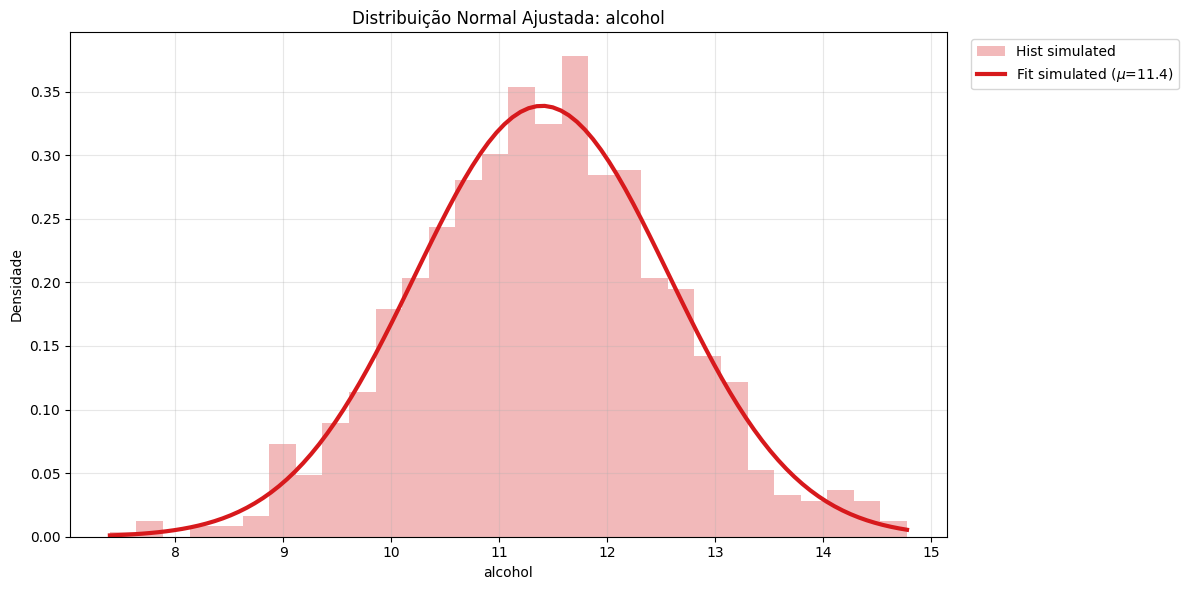

In [22]:
plot_hist_normal_fit(df=df_simulated_data,
                     features=['alcohol'],
                      target='class')

### Gerando tabela de probabilidades

In [23]:
print(f"Parâmetros da Simulação: Média={real_mean:.2f}, Sigma={real_std:.2f}")

# 2. Função para Gerar a Tabela (Igual fizemos antes)
def gerar_tabela_final(mu, sigma):
    # Cenários ajustados para Vinho Branco Premium (Média 11.4)
    cenarios = [
        # Cenário A: Vinho "Fraco" (Risco de Qualidade - Abaixo de 10.5%)
        {"desc": "Álcool < 10.5%", "tipo": "menor", "val1": 10.5, "val2": None},

        # Cenário B: Vinho "Forte" (Acima de 13.5%)
        {"desc": "Álcool > 13.5%", "tipo": "maior", "val1": 13.5, "val2": None},

        # Cenário C: Faixa Padrão (Entre 11% e 12%)
        {"desc": "Entre 11.0% e 12.0%", "tipo": "entre", "val1": 11.0, "val2": 12.0}
    ]

    lista_resultados = []

    for item in cenarios:
        val1, val2 = item["val1"], item["val2"]

        # A. CÁLCULO NÃO PADRONIZADO (Direto com os valores reais)
        if item["tipo"] == "menor":
            prob_raw = norm.cdf(val1, loc=mu, scale=sigma)
        elif item["tipo"] == "maior":
            prob_raw = 1 - norm.cdf(val1, loc=mu, scale=sigma)
        elif item["tipo"] == "entre":
            prob_raw = norm.cdf(val2, loc=mu, scale=sigma) - norm.cdf(val1, loc=mu, scale=sigma)

        # B. CÁLCULO PADRONIZADO (Z-Score)
        # Z = (Val - Média) / Desvio
        z1 = (val1 - mu) / sigma
        z2 = (val2 - mu) / sigma if val2 else 0

        if item["tipo"] == "menor":
            prob_std = norm.cdf(z1)
            str_z = f"Z < {z1:.2f}"
        elif item["tipo"] == "maior":
            prob_std = 1 - norm.cdf(z1)
            str_z = f"Z > {z1:.2f}"
        elif item["tipo"] == "entre":
            prob_std = norm.cdf(z2) - norm.cdf(z1)
            str_z = f"{z1:.2f} < Z < {z2:.2f}"

        lista_resultados.append({
            "Cenário": item["desc"],
            "Prob. (Real)": f"{prob_raw:.4f}",
            "Cálculo Z": str_z,
            "Prob. (Padronizada)": f"{prob_std:.4f}"
        })

    return pd.DataFrame(lista_resultados)

# 3. Exibir Tabela
tabela = gerar_tabela_final(real_mean, real_std)
tabela

Parâmetros da Simulação: Média=11.42, Sigma=1.26


,Cenário,Prob. (Real),Cálculo Z,Prob. (Padronizada)
0,Álcool < 10.5%,0.2328,Z < -0.73,0.2328
1,Álcool > 13.5%,0.0484,Z > 1.66,0.0484
2,Entre 11.0% e 12.0%,0.3090,-0.33 < Z < 0.47,0.3090


# Parte C

**Enunciado da tarefa da parte C:** Para s = 0.80, reproduza a mesma simulação do slide anterior. Faça o cálculo explicitamente, usando a equação. Compare os resultados. Mostre o histograma também para as 10 primeiras amostras.

Configurando parâmetros para o cálculo da Probabilidade Binomial

In [24]:
# numero de tentativas
n = 50

# probabilidade de sucesso
p = 0.80

# probabilidade de fracasso
q = 1 - p

# numero de sucessos alvo
x_target = 40

### Definindo elementos da equação

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy.stats import binom

Numero de combinações

In [26]:
combinacoes = math.comb(n, x_target)

Potências

In [27]:
pow_sucess = p ** x_target
pow_fail = q ** (n - x_target)

Resultado Px final

In [28]:
px = combinacoes * pow_sucess * pow_fail

Imprimindo valores da equação

In [29]:
print(f'---- CÁLCULO DA PROBABILIDADE BINOMIAL para x={x_target} ----\n\n-> Número de combinações (n={n}, x={x_target}): {combinacoes}\n-> Probabilidade para P(x={x_target}): {px:.5f}')

---- CÁLCULO DA PROBABILIDADE BINOMIAL para x=40 ----

-> Número de combinações (n=50, x=40): 10272278170
-> Probabilidade para P(x=40): 0.13982


## Simulações do experimento

### Simulação para grande volume de dados

In [30]:
total_simulacoes = 100000
dados_simulados = binom.rvs(n=n, p=p, size=total_simulacoes)

### Simulação para amostras

In [31]:
sample_10 = dados_simulados[:10]

Imprimindo valores da amostra

In [32]:
print(f'---- PRIMEIRAS 10 AMOSTRAS ----\n-> Amostra: {sample_10}')

---- PRIMEIRAS 10 AMOSTRAS ----
-> Amostra: [40 38 37 40 39 38 39 42 37 37]


## Plotando histogramas

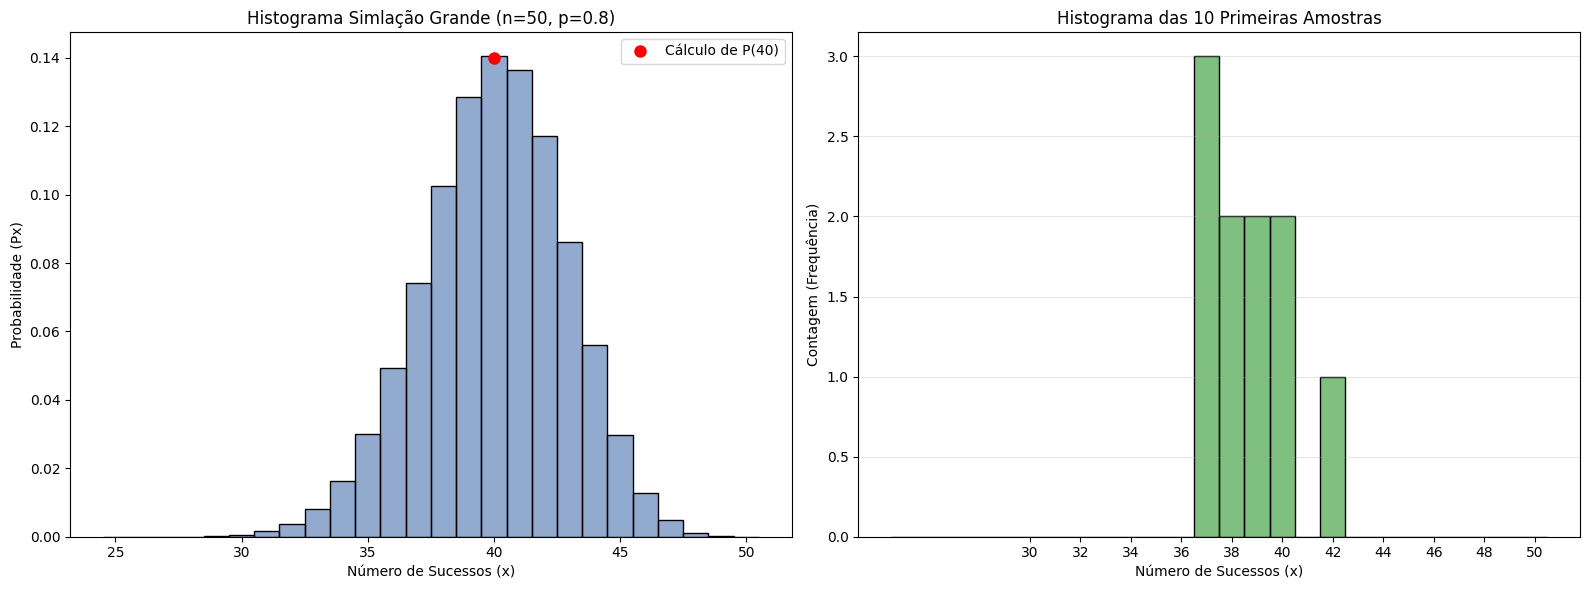

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,6))

sns.histplot(dados_simulados,
             bins=np.arange(25,52)-0.5,
             stat='density',
             color='#4c72b0',
             alpha=0.6,
             ax=ax1)
ax1.set_title(f'Histograma Simlação Grande (n={n}, p={p})')
ax1.set_xlabel('Número de Sucessos (x)')
ax1.set_ylabel('Probabilidade (Px)')

# adicionando ponto de x_target
ax1.plot(x_target, px, 'ro', markersize=8, label=f'Cálculo de P({x_target})')
ax1.legend()

sns.histplot(sample_10,
             bins=np.arange(25, 52)-0.5,
             stat='count',
             color='green',
             alpha=0.5,
             ax=ax2)

ax2.set_title('Histograma das 10 Primeiras Amostras')
ax2.set_xlabel('Número de Sucessos (x)')
ax2.set_ylabel('Contagem (Frequência)')
ax2.set_xticks(range(30, 51, 2))
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()